In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror{font-family:Consolas; font-size:15pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output{font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:15pt;}
div.prompt{min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_renderulli{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10.  N차원 배열 (Numpy 배열) 다루기 </font></b>

# 4. 복사와 뷰

## 4.1 할당

In [15]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [16]:
b = a

In [17]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 3116361237968, numpy.ndarray)

In [18]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 3116361237968, numpy.ndarray)

In [19]:
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [20]:
np.all(a==b)

True

In [21]:
b.shape = (3,4) #할당 받은 b의 shape 수정

In [22]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 3116361237968, numpy.ndarray)

In [23]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 3116361237968, numpy.ndarray)

## 4.2 얕은복사 : 뷰(view)

In [25]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
a.reshape(2,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [29]:
c=a.view()
print(id(a),id(c))

3116391764336 3116365708336


In [30]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [32]:
c.shape=(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [33]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [37]:
c[1, ::2]=[9,9,9]
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [38]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 9,  9,  9, 11]])

## 4.3 깊은복사

In [50]:
a = np.array ([[5, 4,15,1],
              [99,6,16,1],
              [20,5,14,0]])
a

array([[ 5,  4, 15,  1],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [56]:
X = a[:,:-1] # 슬라이싱 될 때는 뷰가 반환 (얕은 복사)
X

array([[ 5,  4, 15],
       [99,  6, 16],
       [20,  5, 14]])

In [57]:
X[:, 0] = -9
X

array([[-9,  4, 15],
       [-9,  6, 16],
       [-9,  5, 14]])

In [58]:
X = a[:,:-1].copy() # 깊은 복사
#X =np.array(a[:,:-1],copy=True) # 깊은복사 방법2
X

array([[-9,  4, 15],
       [-9,  6, 16],
       [-9,  5, 14]])

# 5. 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [4]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [6]:
a[[0,5,9]]

array([ 0, 25, 81])

In [7]:
#인덱싱 하기 위한 값을 배열로 만듦
i = np.array([0,1,1,9])
a[i] #결과는 i(인덱싱 배열)의 형태로 따라감

array([ 0,  1,  1, 81])

In [8]:
i = np.array([[0,1],
             [1,9]])

a[i]

array([[ 0,  1],
       [ 1, 81]])

In [9]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [10]:
a[i] += 10 #1번 인덱스는 1번만 10 증가

In [14]:
# 색상                 R G B
palette = np.array ([[0,0,0], #black
                     [255,0,0], #red
                     [0,255,0], #green
                     [0,0,255], #blue
                     [255,255,255], # white
                     ])

In [21]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data.shape

(10, 10, 3)

In [22]:
from matplotlib import pyplot as plt

In [23]:
import matplotlib.pyplot as plt

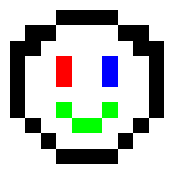

In [34]:
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2 논리배열을 이용한 인덱싱

In [31]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [32]:
a%2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [33]:
a[a%2==0]# 논리배열을 이용한 인덱싱 시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [35]:
a[a>15]

array([16, 17, 18, 19])

# 6. 선형대수
 - 2차원 넘파이 배열을 행렬 
   * 행렬곱 : @
   * 단위행렬 : np.eye(n) : n행 n열 단위행렬
   * 전치행렬 : X.T , X.transpose()
   * 역행렬 : np.linalg.inv(X)

In [37]:
a = np.array([[1,2],
             [3,4]])

a

array([[1, 2],
       [3, 4]])

In [38]:
#a의 역행렬 : a의 역행렬 @ a ==> 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [40]:
np.linalg.inv(a)@a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [45]:
#정방행렬이 아니면 역행렬 구할 수 없음
a = np.array([[1,2,1],
              [3,4,1]])

#np.linalg.inv(a) --> 에러남
a.T @ a

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [46]:
# 전치행렬을 곱하면 정방행렬로
a@a.T

array([[ 6, 12],
       [12, 26]])

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## 6.1 선형 연립방정식 풀기 (단변량 회귀분석): 독립변수1, 데이터 2

## 6.2 선형연립방정식 풀기 (단변량 회귀분석): 독립변수 1, 데이터 n개